## Description

This notebook performs the experiments for nudge impacts for distributions generated by Ising models.

In [1]:
import time
import os
import numpy as np
import networkx as nx
import pandas as pd
import ising_model
import matplotlib.pyplot as plt
import dit
from dist_utils import get_marginals
import pickle

### Generate the network used for the Ising model

#### Network settings

In [9]:
number_of_nodes = 100
network_degree = 2

#### Generate the network

In [4]:
network_backup = ising_model.generate_powerlaw_network(number_of_nodes, network_degree)
network = network_backup.copy()
ising_model.set_values_nodes_ising(network)

/Users/cornelis/anaconda3/envs/SolarAI/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


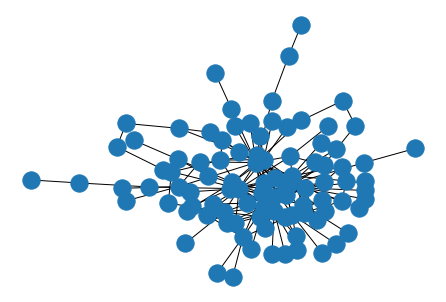

In [5]:
#Visualize the graph to see what you're working with
nx.draw(network)
plt.show()

### Gather samples to estimate the distributions by simulating the ising model

#### Ising model settings

In [28]:
temperature = 2

#### simulation settings

In [27]:
timesteps = 1
number_of_samples = 2500
number_of_distributions = 30

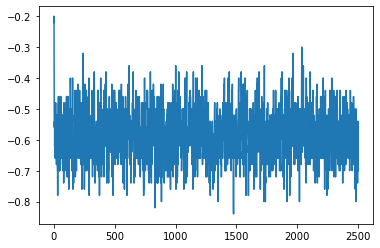

In [28]:
network = ising_model.generate_powerlaw_network(number_of_nodes, network_degree)
ising_model.set_values_nodes_ising(network)

samples = pd.DataFrame(
    data=np.zeros((number_of_samples, len(network.nodes()))), 
    index=range(number_of_samples), 
    columns=network.nodes()
)
for sample_number in range(number_of_samples):

    ising_model.update_network_ising(network, timesteps, temperature, update_method="glauber")
    for node in network.nodes():
        samples.at[sample_number, node] = network.node[node]["value"]

magnetization = samples.sum(axis=1)/samples.shape[1]
plt.plot(magnetization)
plt.show()

1.5

#### perform the simulation and gather the samples and create the distributions

In [2]:
temperatures = np.linspace(0, 3, 21)
number_of_states = 2
max_number_of_neighbors = 9
timesteps = 1
number_of_samples = 3000
number_of_distributions = 30
number_of_nodes = 100
network_degree = 2

In [4]:
start = time.time()

samples_folder = "ising_samples2"
if not os.path.exists(samples_folder):
    os.makedirs(samples_folder)
    

distributions_folder = "ising_distributions"
if not os.path.exists(distributions_folder):
    os.makedirs(distributions_folder)

folder_structure = "{}/temp{:.2f}/n{}"
for t in temperatures:
    for n in range(1,max_number_of_neighbors+1):
        folder_tomake = folder_structure.format(distributions_folder,t,n)
        if not os.path.exists(folder_tomake):
            os.makedirs(folder_tomake)

    
for distribution_number in range(number_of_distributions):
    print("distribution number {}".format(distribution_number))
    network = ising_model.generate_powerlaw_network(number_of_nodes, network_degree)
    
    nx.write_gpickle(network, "{}/network{}_network_size{}_network_degree{}".format(
        samples_folder, distribution_number, number_of_nodes, network_degree
    ))
    for temperature in temperatures:
        ising_model.set_values_nodes_ising(network)
        samples = pd.DataFrame(
            data=np.zeros((number_of_samples, len(network.nodes()))), 
            index=range(number_of_samples), 
            columns=network.nodes()
        )
        for node in network.nodes():
            samples.at[0, node] = network.node[node]["value"]
        for sample_number in range(1,number_of_samples):
            #if sample_number%100 == 0 and sample_number != 0:
            #    print("sample number {}".format(sample_number))

            ising_model.update_network_ising(network, timesteps, temperature, update_method="glauber")
            for node in network.nodes():
                samples.at[sample_number, node] = network.node[node]["value"]

        samples.to_pickle("{}/samples{}_network_size{}_network_degree{}_temp{:.1f}.pkl".format(
            samples_folder, distribution_number, number_of_nodes, network_degree, temperature
        ))
        selected_nodes = ising_model.select_nodes(network, max_number_of_neighbors)
        for selected_node in selected_nodes:
            #print(list(network.neighbors(selected_node)))
            distribution = ising_model.convert_samples_to_dit(
                samples, selected_node, list(network.neighbors(selected_node)),model="ising"
            )
            distribution.make_dense()
            #print(distribution)
            number_of_neighbors = distribution.outcome_length()-1
            count = 0
            dist_file = "{}/temp{:.2f}/n{}/d{}.pkl".format(
                distributions_folder, temperature, number_of_neighbors, count
            )
            while os.path.exists(dist_file):
                count += 1
                dist_file = "{}/temp{:.2f}/n{}/d{}.pkl".format(
                    distributions_folder, temperature, number_of_neighbors, count
                )
            with open(dist_file, "wb") as f:
                pickle.dump(distribution, f)
        #print(samples.loc[:, [1, 2]])
    
print("run time {}".format(time.time()-start))

distribution number 0
distribution number 1
distribution number 2
distribution number 3
distribution number 4
distribution number 5
distribution number 6
distribution number 7
distribution number 8
distribution number 9
distribution number 10
distribution number 11
distribution number 12
distribution number 13
distribution number 14
distribution number 15
distribution number 16
distribution number 17
distribution number 18
distribution number 19
distribution number 20
distribution number 21
distribution number 22
distribution number 23
distribution number 24
distribution number 25
distribution number 26
distribution number 27
distribution number 28
distribution number 29
run time 13816.292001008987


In [29]:
selected_node = ising_model.select_nodes(network, max_number_of_neighbors)[0]
neighbors =  list(network.neighbors(selected_node))
selected_samples = samples.loc[:, neighbors+[node]]
new_columns = list(selected_samples.columns)
ncols = len(new_columns)
new_columns.remove(node)
new_columns.append(node)
selected_samples = selected_samples.reindex(columns=new_columns)

In [4]:
import itertools

for p in itertools.product([-1,1],repeat=n):
    print(p)

(-1, -1, -1, -1, -1, -1, -1, -1, -1)
(-1, -1, -1, -1, -1, -1, -1, -1, 1)
(-1, -1, -1, -1, -1, -1, -1, 1, -1)
(-1, -1, -1, -1, -1, -1, -1, 1, 1)
(-1, -1, -1, -1, -1, -1, 1, -1, -1)
(-1, -1, -1, -1, -1, -1, 1, -1, 1)
(-1, -1, -1, -1, -1, -1, 1, 1, -1)
(-1, -1, -1, -1, -1, -1, 1, 1, 1)
(-1, -1, -1, -1, -1, 1, -1, -1, -1)
(-1, -1, -1, -1, -1, 1, -1, -1, 1)
(-1, -1, -1, -1, -1, 1, -1, 1, -1)
(-1, -1, -1, -1, -1, 1, -1, 1, 1)
(-1, -1, -1, -1, -1, 1, 1, -1, -1)
(-1, -1, -1, -1, -1, 1, 1, -1, 1)
(-1, -1, -1, -1, -1, 1, 1, 1, -1)
(-1, -1, -1, -1, -1, 1, 1, 1, 1)
(-1, -1, -1, -1, 1, -1, -1, -1, -1)
(-1, -1, -1, -1, 1, -1, -1, -1, 1)
(-1, -1, -1, -1, 1, -1, -1, 1, -1)
(-1, -1, -1, -1, 1, -1, -1, 1, 1)
(-1, -1, -1, -1, 1, -1, 1, -1, -1)
(-1, -1, -1, -1, 1, -1, 1, -1, 1)
(-1, -1, -1, -1, 1, -1, 1, 1, -1)
(-1, -1, -1, -1, 1, -1, 1, 1, 1)
(-1, -1, -1, -1, 1, 1, -1, -1, -1)
(-1, -1, -1, -1, 1, 1, -1, -1, 1)
(-1, -1, -1, -1, 1, 1, -1, 1, -1)
(-1, -1, -1, -1, 1, 1, -1, 1, 1)
(-1, -1, -1, -1, 1, 1, 1, -1

In [35]:
tuple(uniques.values[0][:-1])

(-1.0, -1.0)

### Convert the samples to distributions

#### settings for creating the distributions

In [ ]:
number_of_states = 2
max_number_of_neighbors = 9
distributions_folder = "ising_distributions"
if not os.path.exists(distributions_folder):
    os.makedirs(distributions_folder)

samples_folder = "ising_samples2"

In [ ]:

for count in range(number_of_distributions):
    network = nx.read_gpickle("{}/network{}_network_size{}_network_degree{}_temp{:.1f}.pkl".format(
        samples_folder, count, number_of_nodes, network_degree, temperature
    ))
    samples = pd.read_pickle("{}/samples{}_network_size{}_network_degree{}_temp{:.1f}.pkl".format(
        samples_folder, count, number_of_nodes, network_degree, temperature
    ))
    selected_nodes = ising_model.select_nodes(network, max_number_of_neighbors)
    for selected_node in selected_nodes:
        print(list(network.neighbors(selected_node)))
        distribution = ising_model.convert_samples_to_dit(
            samples, selected_node, list(network.neighbors(selected_node))
        )
        
        number_of_neighbors = distribution.outcome_length()-1
        dist_file = "{}/distribution{}_neighbors{}_network_size{}_network_degree{}_beta{:.2f}_gamma{:.2f}.pkl".format(
            distributions_folder, distribution_number, number_of_neighbors, number_of_nodes, network_degree, beta,gamma
        )
        with open(dist_file, "wb") as f:
            pickle.dump(distribution, f)

        #OLD
        #np.save(filename_marginal, marginal)
        #np.save(filename_conditional, conditional)
        #print(distribution)
        
        #input_distribution = 
        #conditional_output_distribution = 
        #save distributions



### Perform nudge experiments

In [ ]:

for count in range(number_of_distributions):
    for number_of_neighbors in range(1, max_number_of_neighbors):
        filename_marginal = "{}/marginal{}_neighbors{}_network_size{}_network_degree{}_temp{:.2f}.pkl".format(
            distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, temperature
        )
        
        filename_conditional = "{}/conditional{}_neighbors{}_network_size{}_network_degree{}_temp{:.2f}.pkl".format(
            distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, temperature
        )
        try:
            if os.path.getsize(filename_marginal) >0:
                with open(filename_marginal, "rb") as f:
                    marginal = pickle.load(f)
                    
            if os.path.getsize(filename_marginal) >0:
                with open(filename_conditional, "rb") as f:
                    conditional = pickle.load(f)            
        except IOError:
            print(filename_marginal, filename_conditional, "file not found")

### Inspect entropy of a certain node

Inspect the entropy of a certain node in the network for a certain degree

In [ ]:
import collections

def get_samples_nodes(network, selected_nodes, temperature):
    samples_selected_nodes = {selected_node:[] for selected_node in selected_nodes}

    for timestep in range(number_of_timesteps):
        for selected_node in selected_nodes:
            samples_selected_nodes[selected_node].append(network.node[selected_node]["value"])

        ising_model.update_network(network, 1, temperature)
        
    return samples_selected_nodes
    
def calculate_flip_probability(series):
    changes = [0 if series[i]==series[i+1] else 1 for i in range(len(series)-1)]
    #print(changes)
    #print(collections.Counter(changes))
    return collections.Counter(changes)[1] / float(len(series))

def get_flip_probabilities(network, selected_nodes, temperature):
    samples_selected_nodes = get_samples_nodes(network, selected_nodes, temperature)
    number_of_neighbors_to_flip_probs = {}
    for selected_node in selected_nodes:
        #print(len(samples_selected_nodes[selected_node]))
        flip_probability = calculate_flip_probability(samples_selected_nodes[selected_node])
#         print("number of neighbors {}, flip probability {}".format(
#             len(list(network.neighbors(selected_node))), flip_probability
#         ))
        number_of_neighbors_to_flip_probs[len(list(network.neighbors(selected_node)))] = flip_probability
        
    return number_of_neighbors_to_flip_probs
        

In [ ]:
temperature = 2.5
number_of_timesteps = 100
max_number_of_neighbors = 8

flip_probabilities = {i:[] for i in range(1, max_number_of_neighbors+1, 1)}
for timestep in range(number_of_timesteps):
    network = ising.generate_powerlaw_network(number_of_nodes, network_degree)
    ising_model.set_values_nodes_uniform(network)
    selected_nodes = ising_model.select_nodes(network, max_number_of_neighbors)

    number_of_neighbors_to_flip_probs = get_flip_probabilities(network, selected_nodes, temperature)
    for number_of_neighbors, flip_probs in number_of_neighbors_to_flip_probs.items():
        flip_probabilities[number_of_neighbors].append(flip_probs)


In [ ]:
for i in range(1, max_number_of_neighbors+1, 1):
    print(np.mean(flip_probabilities[i]))

In [ ]:
-1,-1,-1,-1